In [2]:
from SimPEG import Mesh, Survey, Problem, Utils, Models, Maps, PropMaps, np, sp, Solver as SimpegSolver
from scipy.constants import mu_0
from SimPEG.EM.Base import BaseEMProblem, EMPropMap
from SimPEG.EM.TDEM.BaseTDEM import FieldsTDEM
from SimPEG.Problem import BaseTimeProblem
from simpegAIP.TD.BaseATEM import BaseATEMProblem
from simpegAIP.TD import ProblemATEM_b
import SimPEG.EM as EM
import EMTD
from EMTD.Utils import hzAnalyticCentLoopT
from pymatsolver import MumpsSolver
import matplotlib.pyplot as plt

In [3]:
# timeon = np.cumsum(np.r_[np.ones(10)*1e-3, np.ones(10)*5e-4, np.ones(10)*1e-4])
# timeon -= timeon.max()
# timeoff = np.cumsum(np.r_[np.ones(10)*5e-5, np.ones(10)*1e-4, np.ones(10)*5e-4, np.ones(10)*1e-3, np.ones(10)*1e-3])
# time = np.r_[timeon, timeoff]
# current_on = np.ones_like(timeon)
# current_on[[0,-1]] = 0.
# current = np.r_[current_on, np.zeros_like(timeoff)]
# wave = np.c_[time, current]
cs, ncx, ncz, npad = 20., 25, 25, 15
hx = [(cs,ncx), (cs,npad,1.3)]
hz = [(cs,npad,-1.3), (cs,ncz), (cs,npad,1.3)]
mesh = Mesh.CylMesh([hx,1,hz], '00C')    
prb = ProblemATEM_b(mesh)
prb.waveformType = "STEPOFF"
prb.timeSteps = [(5e-5, 10), (1e-4, 10), (5e-4, 10), (1e-3, 10),(5e-3, 10)]
# prb.currentwaveform(wave)
# prb.t0 = time.min()
tobs = np.logspace(-4, -2, 21)
rx = EM.TDEM.RxTDEM(np.array([[0., 0., 0.]]), tobs, "bz")
src = EM.TDEM.SrcTDEM_CircularLoop_MVP([rx], np.array([[0., 0., 0.]]), 13., "STEPOFF")
survey = EM.TDEM.SurveyTDEM([src])
prb.Solver = MumpsSolver
sigma = np.ones(mesh.nC)*1e-8
active = mesh.gridCC[:,2]<0.
sig_half = 1e-2
sigma[active] = sig_half
prb.pair(survey)

In [4]:
prb.waveformType

'STEPOFF'

In [8]:
tobs = np.logspace(-4, -2, 21)
rx = EM.TDEM.RxTDEM(np.array([[0., 0., 0.]]), tobs, "bz")
src = EM.TDEM.SrcTDEM_CircularLoop_MVP([rx], np.array([[0., 0., 0.]]), 13., "STEPOFF")
survey = EM.TDEM.SurveyTDEM([src])
prb.Solver = MumpsSolver
sigma = np.ones(mesh.nC)*1e-8
active = mesh.gridCC[:,2]<0.
sig_half = 1e-2
sigma[active] = sig_half
prb.pair(survey)

In [10]:
out = survey.dpred(sigma)

>> Step waveform: Non-zero initial condition


In [11]:
out = survey.dpred(sigma)
bz_ana = mu_0*hzAnalyticCentLoopT(13., rx.times, sig_half)

>> Step waveform: Non-zero initial condition


In [12]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


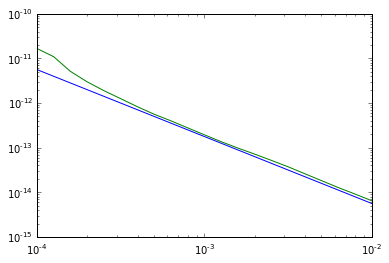

In [13]:
plt.loglog(rx.times, bz_ana)
plt.loglog(rx.times, out)

In [11]:
out

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

0.27337065127601784